<a href="https://colab.research.google.com/github/FadwaLacham/Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis in Python

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



### Step 1: Discover the Dataset

In [ ]:
import pandas as pd  # Importation de la bibliothèque pandas, utilisée pour manipuler des données sous forme de tableaux.

# Charger le dataset
df = pd.read_csv('/content/Reviews.csv')  # Lecture du fichier CSV contenant les données des avis et chargement dans un DataFrame pandas.

# Vérifier la taille et afficher les premières lignes du dataset
print(f"Dataset Shape: {df.shape}")  # Afficher le nombre de lignes et de colonnes du dataset.
print(df.info())  # Obtenir des informations sur les colonnes (types de données, valeurs non nulles, etc.).
print(df.head())  # Afficher les cinq premières lignes du dataset pour avoir un aperçu de son contenu.


Dataset Shape: (114473, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114473 entries, 0 to 114472
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      114473 non-null  int64 
 1   ProductId               114473 non-null  object
 2   UserId                  114473 non-null  object
 3   ProfileName             114466 non-null  object
 4   HelpfulnessNumerator    114473 non-null  int64 
 5   HelpfulnessDenominator  114473 non-null  int64 
 6   Score                   114473 non-null  int64 
 7   Time                    114473 non-null  int64 
 8   Summary                 114469 non-null  object
 9   Text                    114473 non-null  object
dtypes: int64(5), object(5)
memory usage: 8.7+ MB
None
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE

### Step 2: Apply Sentiment Labeling with NLTK VADER

**SentimentIntensityAnalyze**r est un outil de NLTK qui permet de calculer un score de polarité pour un texte, indiquant si le sentiment est positif, négatif ou neutre.



**tqdm** est utilisé pour afficher une barre de progression dans les notebooks Jupyter, ce qui permet de suivre l'avancement de l'analyse.

In [ ]:
import nltk  # Importation de la bibliothèque NLTK
nltk.download('vader_lexicon')  # Téléchargement du lexique VADER pour l'analyse des sentiments.


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer  # Importation de l'analyseur de sentiments VADER.
from tqdm.notebook import tqdm  # Barre de progression pour les boucles.

sia = SentimentIntensityAnalyzer()  # Initialisation de VADER.

In [ ]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [ ]:
sia.polarity_scores('I am so sad!')

{'neg': 0.648, 'neu': 0.352, 'pos': 0.0, 'compound': -0.5697}

In [ ]:
# Calcul des scores de polarité pour tout le dataset
res = {}  # Dictionnaire pour stocker les résultats des scores de sentiment.
for i, row in tqdm(df.iterrows(), total=len(df)):  # Parcourir chaque ligne du dataset avec une barre de progression.
    text = row['Text']  # Extraire le texte de la colonne 'Text'.
    myid = row['Id']  # Extraire l'identifiant unique de la colonne 'Id'.
    res[myid] = sia.polarity_scores(text)  # Calculer et stocker les scores de sentiment associés à l'ID.

  0%|          | 0/568454 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T  # Convertir le dictionnaire des résultats en DataFrame et transposer.
vaders = vaders.reset_index().rename(columns={'index': 'Id'})  # Réinitialiser les index et renommer la colonne 'index' en 'Id'.
vaders = vaders.merge(df, how='left')  # Fusionner les scores VADER avec le dataset original sur la colonne 'Id'.

In [ ]:
# Afficher les premières lignes pour voir les scores de sentiment et les métadonnées associées
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment Scores,Compound Score,Sentiment Label,Expected Label,Match
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,"{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'comp...",0.9441,Positive,Positive,True
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,"{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'comp...",-0.5664,Negative,Negative,True
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,"{'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'co...",0.8265,Positive,Positive,True
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,Negative,False
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,"{'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'comp...",0.9468,Positive,Positive,True


### Step 3: Visualize the Sentiment Labels

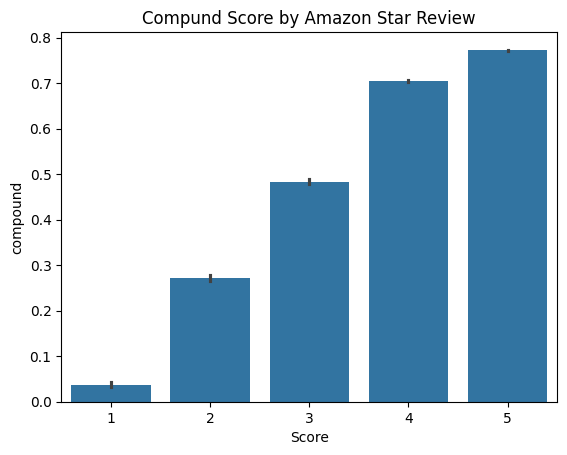

In [ ]:
# Créer un graphique en barres pour visualiser le score compound en fonction des évaluations (stars) d'Amazon
ax = sns.barplot(data=vaders, x='Score', y='compound')  # Barplot avec 'Score' sur l'axe X et 'compound' sur l'axe Y.
ax.set_title('Compound Score by Amazon Star Review')  # Ajouter un titre au graphique.
plt.show()  # Afficher le graphique.

Ce graphe montre la relation entre le score compound (analyse de sentiment via VADER) et les évaluations (scores d'étoiles) des avis Amazon. On observe une corrélation positive : les avis avec un score d'étoiles élevé (4 ou 5) ont des scores compound plus proches de 1, indiquant des sentiments plus positifs, tandis que les scores d'étoiles faibles (1 ou 2) affichent des sentiments plus neutres ou négatifs.

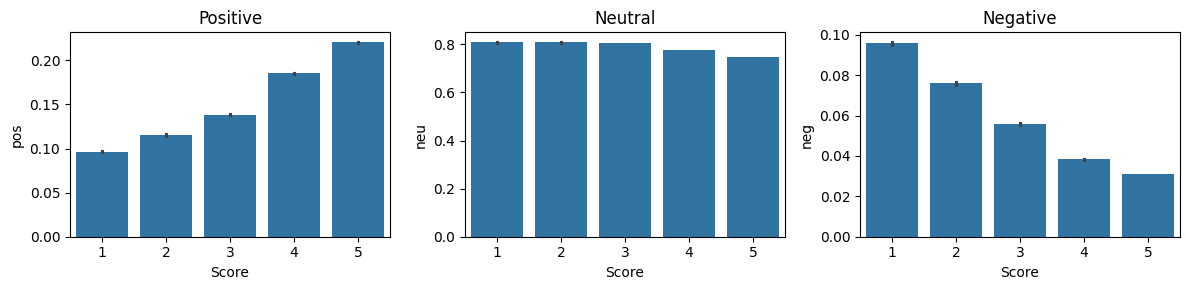

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

### Step 4 . Roberta Pretrained Model



*   Use a model trained of a large corpus of data.
*   Transformer model accounts for the words but also the context related to other words.



In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
# Définition du nom du modèle pré-entraîné à utiliser pour l'analyse des sentiments sur Twitter
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
# Cette variable contient le nom du modèle pré-entraîné disponible sur Hugging Face.
# Le modèle "cardiffnlp/twitter-roberta-base-sentiment" est basé sur RoBERTa et est spécifiquement formé pour l'analyse des sentiments dans les tweets.

# Chargement du tokenizer pour transformer le texte en tokens numériques
tokenizer = AutoTokenizer.from_pretrained(MODEL)
# Le tokenizer est responsable de la tokenisation du texte d'entrée.
# Il prend un texte brut et le découpe en tokens (mots, sous-mots ou caractères) et les convertit en indices numériques que le modèle peut comprendre.
# Le tokenizer est chargé depuis le modèle pré-entraîné pour s'assurer que la tokenisation correspond exactement à celle utilisée pendant l'entraînement du modèle.

# Chargement du modèle pré-entraîné pour la classification des séquences
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
# Le modèle RoBERTa est chargé ici pour effectuer de la classification de séquences.
# Le modèle a été entraîné pour prédire les sentiments dans des tweets (ou d'autres textes informels similaires),
# et il renverra une probabilité pour chaque classe de sentiment (par exemple, positif, négatif, neutre).
# La fonction from_pretrained() charge le modèle avec les poids déjà appris pendant l'entraînement.

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
# VADER results on example
example = "I absolutely love this new phone! It's amazing."
print(example)
sia.polarity_scores(example)

I absolutely love this new phone! It's amazing.


{'neg': 0.0, 'neu': 0.368, 'pos': 0.632, 'compound': 0.862}

In [ ]:
# Tokeniser le texte d'entrée et le convertir dans un format compréhensible par le modèle
encoded_text = tokenizer(example, return_tensors='pt')

# Obtenir les scores bruts de sentiment du modèle
output = model(**encoded_text)

# Extraire les scores de sentiment et les convertir en un tableau NumPy
scores = output[0][0].detach().numpy()

# Appliquer le softmax pour convertir les scores bruts en probabilités
scores = softmax(scores)

# Stocker les probabilités pour chaque sentiment dans un dictionnaire
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}

# Afficher le dictionnaire avec les probabilités des sentiments
print(scores_dict)


{'roberta_neg': 0.0022208933, 'roberta_neu': 0.0051718783, 'roberta_pos': 0.99260724}


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#bibliothèque de modèles NLP pré-entraînés
from transformers import RobertaTokenizer, RobertaForSequenceClassification
#pour transformer les scores bruts (logits) en probabilités.
from scipy.special import softmax

# Charger le modèle et le tokenizer RoBERTa
#convertit les textes en un format que le modèle peut comprendre (vecteurs numériques).
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)

# Charger le dataset
df = pd.read_csv('/content/drive/MyDrive/Reviews.csv').head(2000)

# Fonction pour obtenir les scores de sentiment à partir de RoBERTa
def get_roberta_sentiment(text):
  #La fonction encode le texte en un format compatible avec RoBERTa.
    encoded_text = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    #Les scores de sortie du modèle sont transformés en probabilités avec la fonction softmax.
    scores = softmax(scores)
    return scores

# Liste pour stocker les scores de sentiment
scores_list = []

# Appliquer RoBERTa sur chaque texte du dataset
for review in df['Text']:  # la colonne dans le CSV
    scores = get_roberta_sentiment(review)
    scores_dict = {
        'text': review,  # Inclure le texte original
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    scores_list.append(scores_dict)

# Convertir les résultats en DataFrame pour faciliter l'analyse
scores_df = pd.DataFrame(scores_list)

# Ajouter une colonne avec les sentiments dominants
scores_df['dominant_sentiment'] = scores_df[['roberta_neg', 'roberta_neu', 'roberta_pos']].idxmax(axis=1)

# Affichage des premières lignes du DataFrame
print(scores_df.head())

# Calcul des pourcentages de chaque sentiment
sentiment_counts = scores_df['dominant_sentiment'].value_counts()

# Création du graphique à barres
plt.figure(figsize=(8, 5))
bars = plt.bar(sentiment_counts.index, sentiment_counts.values, color=['red', 'gray', 'green'])

# Ajouter un titre et des labels
plt.title("Répartition des Sentiments dans le Dataset Reviews", fontsize=14)
plt.xlabel("Sentiment Dominant", fontsize=12)
plt.ylabel("Nombre de Reviews", fontsize=12)

# Ajouter les nombres au-dessus des barres
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=10)

# Afficher le graphique
plt.show()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
